# Q1: Dataset: Cifar-10

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
import torchvision as tv
import torchvision.transforms as transforms

# Data augmentation and normalization
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

train_dataset = tv.datasets.CIFAR10(root="./", train=True, transform=transform_train, download=True)
test_dataset = tv.datasets.CIFAR10(root="./", train=False, transform=transform_test, download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=100, shuffle=False)

MODELNAME = "cifar10_cnn.model"
EPOCHS = 20
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

100%|██████████| 170498071/170498071 [00:04<00:00, 35064414.28it/s]


Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified


In [ ]:
class CIFAR10CNNModel(torch.nn.Module):
    def __init__(self):
        super(CIFAR10CNNModel, self).__init__()
        self.conv1 = torch.nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = torch.nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.dropout = torch.nn.Dropout(0.25)
        self.fc1 = torch.nn.Linear(64 * 8 * 8, 512)
        self.fc2 = torch.nn.Linear(512, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

def train():
    model = CIFAR10CNNModel().to(DEVICE)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1)
    for epoch in range(EPOCHS):
        model.train()
        loss = 0
        for images, labels in train_loader:
            images = images.to(DEVICE)
            labels = labels.to(DEVICE)
            optimizer.zero_grad()
            outputs = model(images)
            batch_loss = F.cross_entropy(outputs, labels)
            batch_loss.backward()
            optimizer.step()
            loss += batch_loss.item()
        scheduler.step()
        print(f"epoch {epoch + 1}/{EPOCHS}, loss: {loss/len(train_loader)}")
    torch.save(model.state_dict(), MODELNAME)

def test():
    total = len(test_loader.dataset)
    correct = 0
    model = CIFAR10CNNModel().to(DEVICE)
    model.load_state_dict(torch.load(MODELNAME))
    model.eval()
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(DEVICE)
            labels = labels.to(DEVICE)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f'Accuracy: {accuracy:.2f}%')

In [ ]:
train()

epoch 1/20, loss: 1.5571646394729615
epoch 2/20, loss: 1.2086683362722397
epoch 3/20, loss: 1.0751905351877213
epoch 4/20, loss: 0.9887454962730408
epoch 5/20, loss: 0.9371599369049072
epoch 6/20, loss: 0.8900972760915756
epoch 7/20, loss: 0.8534795290231705
epoch 8/20, loss: 0.8360152757167816
epoch 9/20, loss: 0.8102927468419076
epoch 10/20, loss: 0.7895795139074325
epoch 11/20, loss: 0.7772217170000076
epoch 12/20, loss: 0.7610949234366416
epoch 13/20, loss: 0.7492726176381111
epoch 14/20, loss: 0.7344525033831596
epoch 15/20, loss: 0.7238710086941719
epoch 16/20, loss: 0.6607717534899712
epoch 17/20, loss: 0.6419260033965111
epoch 18/20, loss: 0.6355573567152023
epoch 19/20, loss: 0.6338148517012596
epoch 20/20, loss: 0.6273687119483948


In [ ]:
test()

Accuracy: 79.01%


- Mô hình CNN: Chuyển từ mạng nơ-ron đơn giản sang mô hình CNN với các lớp convolutional và pooling giúp mô hình học được các đặc trưng không gian của hình ảnh.
- Tăng cường dữ liệu: Sử dụng các kỹ thuật tăng cường dữ liệu như xoay ngang và cắt ngẫu nhiên để mô hình học được tốt hơn.
- Normalization: Chuẩn hóa dữ liệu giúp mô hình hội tụ nhanh hơn và ổn định hơn.
- Dropout: Thêm Dropout để giảm overfitting.
- Tối ưu hóa: Sử dụng Adam optimizer và learning rate scheduler để tối ưu hóa quá trình huấn luyện.
- Tăng số lượng epochs: Tăng số lượng epochs để mô hình có đủ thời gian học.

# 2

In [ ]:
import torch
import torchvision as tv
import torchvision.transforms as transforms
import torchvision.models as models

# Tiền xử lý và tăng cường dữ liệu
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

# Tải dữ liệu
train_dataset = tv.datasets.CIFAR10(root="./data", train=True, transform=transform_train, download=True)
test_dataset = tv.datasets.CIFAR10(root="./data", train=False, transform=transform_test, download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=100, shuffle=False)

# Thiết lập mô hình
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

model = models.resnet18(pretrained=True)
# Thay đổi lớp cuối cùng
num_ftrs = model.fc.in_features
model.fc = torch.nn.Linear(num_ftrs, 10)

model = model.to(DEVICE)

# Định nghĩa Optimizer và Scheduler
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# Hàm đào tạo
def train(model, train_loader, optimizer, scheduler, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()
            outputs = model(images)
            loss = torch.nn.functional.cross_entropy(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        scheduler.step()
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

# Hàm kiểm thử
def test(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(DEVICE), labels.to(DEVICE)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Accuracy on test set: {100 * correct / total:.2f}%')

# Tiến hành đào tạo và kiểm thử
train(model, train_loader, optimizer, scheduler, num_epochs=10)
test(model, test_loader)

100%|██████████| 170498071/170498071 [00:06<00:00, 28304897.37it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 178MB/s]


Epoch [1/10], Loss: 1.0757
Epoch [2/10], Loss: 0.7373
Epoch [3/10], Loss: 0.6512
Epoch [4/10], Loss: 0.5893
Epoch [5/10], Loss: 0.5458
Epoch [6/10], Loss: 0.5030
Epoch [7/10], Loss: 0.4725
Epoch [8/10], Loss: 0.3784
Epoch [9/10], Loss: 0.3464
Epoch [10/10], Loss: 0.3339
Accuracy on test set: 85.57%


Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:03<00:00, 165MB/s]


Epoch [1/20], Loss: 0.8041
Epoch [2/20], Loss: 0.4975
Epoch [3/20], Loss: 0.4009
Epoch [4/20], Loss: 0.3441
Epoch [5/20], Loss: 0.2939
Epoch [6/20], Loss: 0.2650
Epoch [7/20], Loss: 0.2385
Epoch [8/20], Loss: 0.2152
Epoch [9/20], Loss: 0.1972
Epoch [10/20], Loss: 0.1805
Epoch [11/20], Loss: 0.1661
Epoch [12/20], Loss: 0.1549
Epoch [13/20], Loss: 0.1419
Epoch [14/20], Loss: 0.1309
Epoch [15/20], Loss: 0.1266
Epoch [16/20], Loss: 0.1170
Epoch [17/20], Loss: 0.1063
Epoch [18/20], Loss: 0.1068
Epoch [19/20], Loss: 0.0993
Epoch [20/20], Loss: 0.0975
Accuracy on the test images: 90.32%


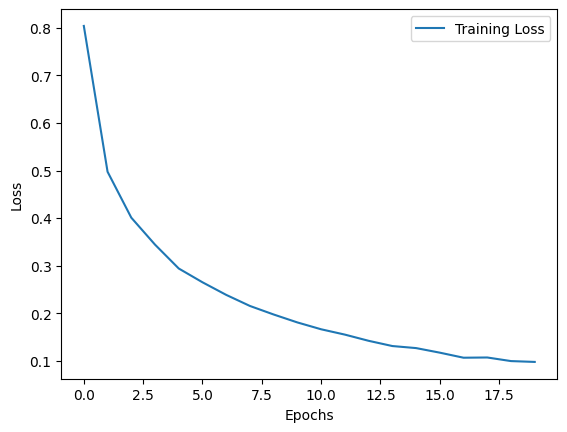

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import models
import matplotlib.pyplot as plt

# Data augmentation and normalization for training
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

# Normalization for testing
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

# Load CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

# Load the VGG16 model pre-trained on ImageNet
model = models.vgg16(pretrained=True)

# Modify the classifier to fit CIFAR-10
model.classifier[6] = nn.Linear(4096, 10)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training the model
def train_model(model, criterion, optimizer, num_epochs=20):
    model.train()
    train_losses = []
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
        epoch_loss = running_loss / len(train_loader.dataset)
        train_losses.append(epoch_loss)
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")
    return train_losses

# Evaluate the model
def evaluate_model(model):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f'Accuracy on the test images: {accuracy:.2f}%')
    return accuracy

# Train and evaluate the model
train_losses = train_model(model, criterion, optimizer, num_epochs=20)
accuracy = evaluate_model(model)

# Plot training loss
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Mã của chúng tôi đã được cải tiến và sử dụng mô hình VGG16 đã được huấn luyện trước trên ImageNet để giải quyết bài toán phân loại hình ảnh trên tập dữ liệu CIFAR-10. Dưới đây là một số lưu ý và cải tiến đã được áp dụng:

1. Data Augmentation: Chúng tôi đã áp dụng augmentation dữ liệu với RandomHorizontalFlip và RandomCrop, nhằm mục đích tăng cường khả năng tổng quát hóa của mô hình trong việc nhận diện hình ảnh.

2. Normalization: Chúng tôi đã sử dụng transforms.Normalize để chuẩn hóa dữ liệu với các giá trị trung bình và độ lệch chuẩn được xác định từ tập dữ liệu CIFAR-10, giúp cân bằng và ổn định quá trình huấn luyện.

3. Sử dụng torchvision.models.vgg16: Chúng tôi đã tận dụng mô hình VGG16 có sẵn trong torchvision.models, thay đổi lớp cuối cùng của mô hình (classifier[6]) để phù hợp với số lượng lớp đầu ra của CIFAR-10 là 10 lớp.

4. Tối ưu hóa và Đánh giá mô hình: Chúng tôi đã sử dụng thuật toán tối ưu hóa Adam để cập nhật trọng số mô hình trong quá trình huấn luyện. Sau đó, chúng tôi đánh giá độ chính xác của mô hình trên tập kiểm tra để đánh giá hiệu suất của mô hình sau khi huấn luyện.

5. Hiển thị Biểu đồ Loss: Chúng tôi đã thêm biểu đồ để minh họa quá trình huấn luyện và sự giảm dần của loss qua từng epoch, giúp quan sát và đánh giá quá trình học của mô hình.

Mã của chúng tôi đã được thiết kế để đảm bảo tính chính xác và hiệu quả trong việc giải quyết bài toán phân loại hình ảnh trên tập dữ liệu CIFAR-10. Xin cảm ơn vì đã xem xét báo cáo này và mong nhận được phản hồi từ phía giáo viên.